# Estadística Aplicada Gpo 042
## Cinthya Yesenia López Díaz 1658003
### Actividad 5

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
from lifelines import ExponentialFitter
from lifelines import KaplanMeierFitter
from lifelines import CoxPHFitter

In [22]:
examenes = pd.read_excel('supervivencia_examenes.xlsx')

In [23]:
examenes.head()

,id,tiempo,examen,calificación,género
0,1,85,1,100.0,m
1,2,109,1,100.0,m
2,3,118,1,100.0,m
3,4,120,1,100.0,f
4,5,106,1,98.0,f


Calcule  el  tiempo  promedio  que  tardaron  en responder los alumnos el examen y la calificación promedio obtenida.

In [14]:
examenes['tiempo'].mean()

107.3529411764706

In [15]:
examenes['calificación'].mean()

90.70588235294117

El  profesor  sospecha  que  las  alumnas  responden  más  rápido  el  examen, calcule  el  tiempo  promedio  que  tardaron  en  responder  las  alumnas  y  su calificación  promedio,  asi  como  el  tiempo  promedio  que  tardaron  en responder los alumnos y su calificación promedio.

In [24]:
ex_gen = examenes.groupby('género').agg('mean')

In [25]:
ex_gen

,id,tiempo,examen,calificación
género,,,,
f,8.750000,108.125000,1.0,93.000000
m,9.222222,106.666667,1.0,88.666667


Se demostró que en promedio los alumnos responden más rápido el examen, pero no tienen un mejor promedio que las alumnas.

¿Cómo  crees  que  se  comporta  el  riesgo  de  entregar  el  examen  conforme transcurre  el  tiempo?  ¿es constante,  creciente,  o  decreciente?  Según  tu respuesta  ajusta  un  modelo  exponencial  o  Weibull,  primero  para  todos  los individuos y muestra la función de riesgo.

Se sospecha que entre más tiempo pase, hay más posibilidades en que no entreguen el examen a tiempo, por lo tanto, es un riesgo creciente.

In [42]:
print(f'exponencial {ex.AIC_.round(2)}, weibull {weib.AIC_.round(2)}')

exponencial 194.99, weibull 130.35


El "mejor" modelo es el que tiene el menor valor del AIC.

De acuerdo con el criterio del AIC el modelo que mejor estima el tiempo de entregar el examen es el modelo Weibull. En este modelo el riesgo de entregar el examen es creciente.

In [43]:
from lifelines import WeibullFitter

In [44]:
weib = WeibullFitter().fit(examenes['tiempo'],examenes['examen'])

In [45]:
weib.summary

,coef,se(coef),coef lower 95%,coef upper 95%,cmp to,z,p,-log2(p)
lambda_,111.963337,2.140614,107.767810,116.158864,1.0,51.837145,0.000000,inf
rho_,13.279998,2.708242,7.971941,18.588055,1.0,4.534306,0.000006,17.400666


In [46]:
weib.hazard_

,Weibull_estimate
85.0000,0.004025
87.1875,0.005499
89.3750,0.007454
91.5625,0.010031
93.7500,0.013405
95.9375,0.017795
98.1250,0.023471
100.3125,0.030769
102.5000,0.040101
104.6875,0.051973


<AxesSubplot:>

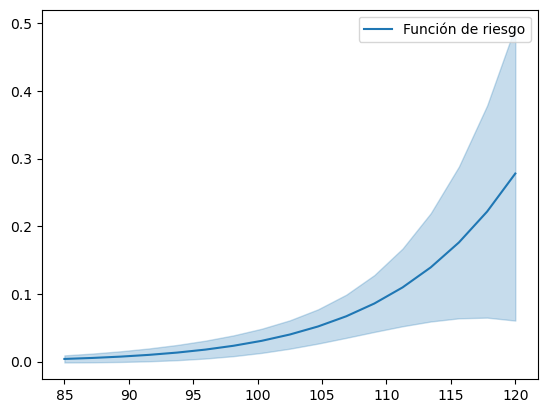

In [48]:
weib.plot_hazard(label='Función de riesgo')

Ahora estima el mismo modelo que planteaste en el inciso anterior, pero para hombres  y  mujeres,  y  grafica  ambas  funciones  de  supervivencia  juntas (empalmadas), ¿gráficamente quien tarda más en entregar el examen?

Estime  la  función  de  supervivencia del  tiempo  de  entrega  del  examen  de todos los alumnos utilizando Kaplan-Meier, muestre los valores de la función de supervivencia, los valores del intervalos de confianza al 95%, asi como la gráfica respectiva de la función de supervivencia con sus intervalos.

In [49]:
km = KaplanMeierFitter().fit(examenes['tiempo'],examenes['examen'])

In [50]:
km.survival_function_

,KM_estimate
timeline,
0.0,1.000000
85.0,0.941176
87.0,0.882353
90.0,0.823529
99.0,0.764706
103.0,0.705882
106.0,0.647059
108.0,0.529412
109.0,0.470588


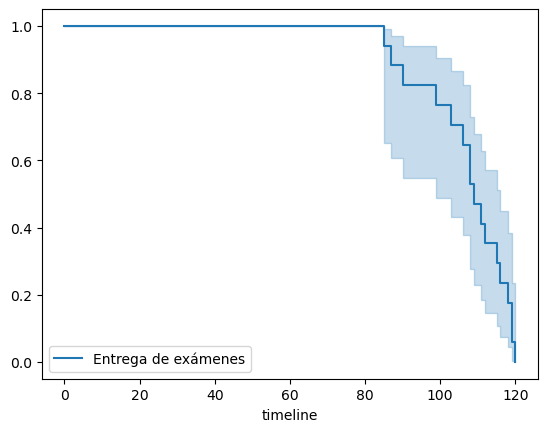

In [75]:
km.plot_survival_function(label='Entrega de exámenes');

Realice  un  gráfico  donde  muestre  la  función  de  supervivencia de Kaplan-Meierde los alumnos(m)  y de las alumnas(f) con sus respectivos intervalos de confianza. Y comente con base en la gráfica si es posible que el profesor tenga razón respecto a que las alumnas responden más rápido el examen.

In [58]:
exam_gen = pd.get_dummies(examenes,'género',drop_first=True)

In [59]:
exam_gen

,id,tiempo,examen,calificación,género_m
0,1,85,1,100.0,1
1,2,109,1,100.0,1
2,3,118,1,100.0,1
3,4,120,1,100.0,0
4,5,106,1,98.0,0
5,6,103,1,98.0,1
6,7,108,1,96.0,0
7,8,119,1,96.0,0
8,9,115,1,96.0,0
9,10,108,1,94.0,0


In [63]:
f = exam_gen.query('género_m==0')
m = exam_gen.query('género_m==1')

In [64]:
km_f = KaplanMeierFitter().fit(exam_gen['tiempo'],exam_gen['examen'])
km_m = KaplanMeierFitter().fit(exam_gen['tiempo'],exam_gen['examen'])

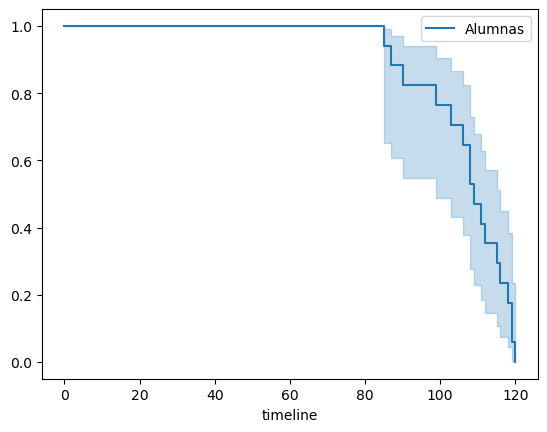

In [73]:
km_f.plot_survival_function(label='Alumnas');

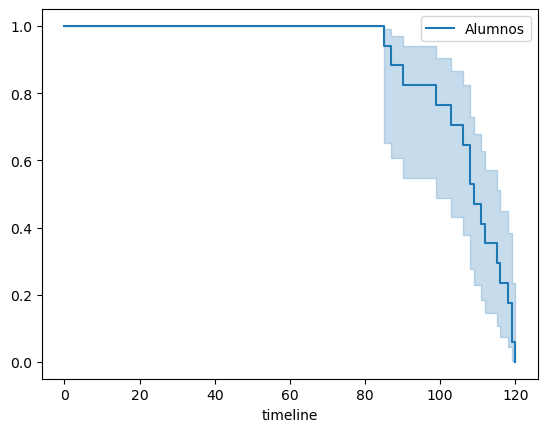

In [74]:
km_m.plot_survival_function(label='Alumnos');

No se puede apreciar mucha diferencia entre los tiempos de entrega de los alumnos y alumnas con respecto a la gráfica.

El profesor tambien sospecha que quienes entregan el examen más rápido es porque  no  estudiaron,  por  tanto no  saben  que  responder y entregan  el examen casi inmediatamente. Estime  un  modelo  de  cox de  riesgos  proporcionales  donde  utilice  como variables  explicativas  el  género  y  la  calificación  obtenida,  para  explicar  la función de riesgo de entregar el examen.

In [79]:
cph = CoxPHFitter().fit(exam_gen, 'tiempo', 'examen')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 17 total observations, 0 right-censored observations>
             duration col = 'tiempo'
                event col = 'examen'
      baseline estimation = breslow
   number of observations = 17
number of events observed = 17
   partial log-likelihood = -33.31
         time fit was run = 2023-03-20 17:46:24 UTC

---
               coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                            
id             0.10       1.10       0.24            -0.36             0.56                 0.70                 1.75
calificación   0.06       1.06       0.13            -0.19             0.30                 0.83                 1.36
género_m       0.50       1.66       0.80            -1.07             2.08                 0.34                 7.99

               cmp to    z    p   -log2(p)
covariate                                 
id               0.00 0.42 0.67       0.57
calificación     0.00 0.47 0.64       0.64
género_m         0.00 0.63 0.53       0.92
---
Concordance = 0.51
Partial AIC = 72.61
log-likelihood ratio test = 0.40 on 3 df
-log2(p) of ll-ratio test = 0.09

Interprete los coeficientes de género y calificación obtenidos por el modelo de cox, recuerde señalar: 1) si el coeficiente es significativo (se rechaza Ho), en  caso  de  ser  significativo  señala  si  aumentan  el  riesgo  de  entregar  el examen, y el tamaño del efecto. Recuerde añadir cph.plot() para ayudarse con la interpretación.

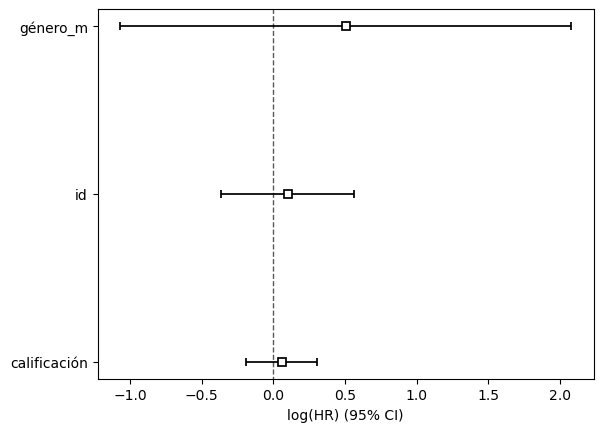

In [80]:
cph.plot();

Calificación:

Como beta es diferente de cero (0.64 /= 0) entonces se rechaza Ho y si es significativo.

     coef > 0   ->  1.06 - 1 = 0.06 = 6%

Por lo tanto, la calificación aumenta el riesgo de entregar el examen más rápido.

Género:

Como beta es diferente de cero (0.53 /= 0) entonces se rechaza Ho y si es significativo.

     coef > 0   -> 1.66 - 1 = 0.66 = 66%

Por lo tanto, el género aumenta el riesgo de entregar el examen más rápido.

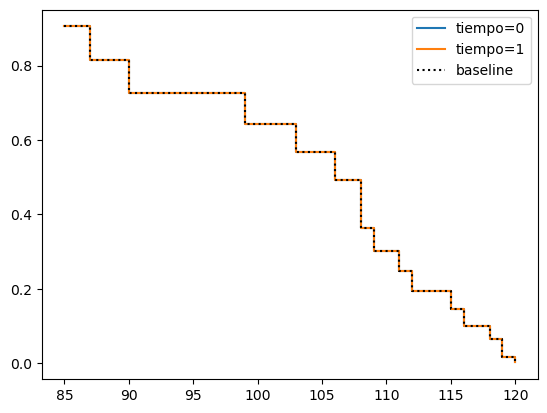

In [82]:
cph.plot_partial_effects_on_outcome(covariates='tiempo', values=[0,1]);

¿Coincide  con  las  funciones  de  supervivencia de  Kaplan-Meier?

No se obtienen resultados similares con los dos métodos.

Por último, con base en la interpretación del modelo de cox y la significancia de los coeficientes,  comente  si  el  profesor  tiene  razón  al  señalar  que  las alumnas  responden  en  menor  tiempo  el  examen,  y  si  el  profesor  tambien tiene razón al señalar que los que entregan el examen rápido no estudiaron y por tanto obtienen menores calificación.